In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns, matplotlib.pyplot as plt
# from jsonschema import validate, ValidationError

import warnings; warnings.filterwarnings('ignore')

# Display all columns in dataframes

pd.set_option('display.max_columns', None)


dataset_path = "G:\\My Drive\\Study\\Projects - Data\\Data Projects - Analysis for Fun 1\\data\\datasets-property-click-prediction"


# Function for Checking NULL Counts and NULL Percentages
# ======================================================
def check_null(df):
        
    null_counts = pd.DataFrame(df.isnull().sum(), columns=['Null_Count'])
    null_percentage = pd.DataFrame(round((df.isnull().sum()/len(df))*100, 2), columns=['Null_Percentage'])
    
    # Combining the two dataframes
    null_info = pd.concat([null_counts, null_percentage], axis = 1)

    # Filtering to show only rows where Null_Count > 0
    null_info = null_info[null_info['Null_Count'] > 0]
    
    return null_info   

## Pre-processing, Exploratory Data Analysis (EDA) & Feature Engineering

In [24]:
df = pd.read_csv(os.path.join(dataset_path, "merged_property_data.csv"))
print(df.shape)
display(df.head(2))

(28888, 26)


,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,total_interactions,count_3_days,count_5_days,count_7_days
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-09-03 14:36:00,1,3,4,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4.0,0.0,0.0,0.0
1,ff8080814702d3d10147068359d200cd,BHK2,2017-07-03 12:02:00,2,4,11,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,12.0,0.0,0.0,0.0


### Data Cleaning and Pre-Processing

In [25]:
# Re-check for missing values
check_null(df)

,Null_Count,Null_Percentage
total_interactions,6109,21.15
count_3_days,6109,21.15
count_5_days,6109,21.15
count_7_days,6109,21.15


In [26]:
# We see that the 4 columns that we created for counting interactions (count_3_days, count_5_days, count_7_days, total_interactions) have missing values.
# This is due to the fact that some of the property_ids didn't have the interaction informations.

# So for the sake of simplicity, we will considered that these properties were not viewed, or interacted on.
# Hence we replace the missing values with 0.

df['total_interactions'] = df['total_interactions'].fillna(0)
df['count_3_days'] = df['count_3_days'].fillna(0)
df['count_5_days'] = df['count_5_days'].fillna(0)
df['count_7_days'] = df['count_7_days'].fillna(0)

check_null(df)

,Null_Count,Null_Percentage


In [27]:
# We see the nulls have been successfully handled, and no nulls are found in the dataset.

# Now checking the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         28888 non-null  object 
 1   type                28888 non-null  object 
 2   activation_date     28888 non-null  object 
 3   bathroom            28888 non-null  int64  
 4   floor               28888 non-null  int64  
 5   total_floor         28888 non-null  int64  
 6   furnishing          28888 non-null  object 
 7   gym                 28888 non-null  int64  
 8   latitude            28888 non-null  float64
 9   longitude           28888 non-null  float64
 10  lease_type          28888 non-null  object 
 11  lift                28888 non-null  int64  
 12  locality            28888 non-null  object 
 13  parking             28888 non-null  object 
 14  property_age        28888 non-null  int64  
 15  property_size       28888 non-null  int64  
 16  swim

In [28]:
df.head(2)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,total_interactions,count_3_days,count_5_days,count_7_days
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-09-03 14:36:00,1,3,4,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4.0,0.0,0.0,0.0
1,ff8080814702d3d10147068359d200cd,BHK2,2017-07-03 12:02:00,2,4,11,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,12.0,0.0,0.0,0.0


In [29]:
# We see that types of some columns need to be changed for further analysis
# 
df['activation_date'] = pd.to_datetime(df['activation_date'])
df['pin_code'] = df['pin_code'].astype(str)
df['total_interactions'] = df['total_interactions'].astype(int)
df['count_3_days'] = df['count_3_days'].astype(int)
df['count_5_days'] = df['count_5_days'].astype(int)
df['count_7_days'] = df['count_7_days'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   property_id         28888 non-null  object        
 1   type                28888 non-null  object        
 2   activation_date     28888 non-null  datetime64[ns]
 3   bathroom            28888 non-null  int64         
 4   floor               28888 non-null  int64         
 5   total_floor         28888 non-null  int64         
 6   furnishing          28888 non-null  object        
 7   gym                 28888 non-null  int64         
 8   latitude            28888 non-null  float64       
 9   longitude           28888 non-null  float64       
 10  lease_type          28888 non-null  object        
 11  lift                28888 non-null  int64         
 12  locality            28888 non-null  object        
 13  parking             28888 non-null  object    

In [30]:
# We see that the types of columns have been successfully changed.
# Now we check for outliers in the dataset.

display(df.describe())

,activation_date,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,total_interactions,count_3_days,count_5_days,count_7_days
count,28888,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,2.888800e+04,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000
mean,2017-04-23 01:54:13.134865664,1.795867,1.786659,3.518035,0.165951,12.957859,77.605186,0.279009,4.380539,966.338999,0.142585,14430.768797,1.233257e+05,3.461403,5.905947,0.820756,1.227534,1.567952
min,2017-01-02 09:11:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-02-25 18:12:00,1.000000,0.000000,2.000000,0.000000,12.906324,77.563295,0.000000,0.000000,600.000000,0.000000,8000.000000,5.000000e+04,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2017-03-21 14:21:30,2.000000,1.000000,3.000000,0.000000,12.953939,77.614568,0.000000,3.000000,900.000000,0.000000,12500.000000,1.000000e+05,2.000000,3.000000,0.000000,0.000000,0.000000
75%,2017-06-02 12:05:15,2.000000,2.000000,4.000000,0.000000,13.009369,77.669235,1.000000,6.000000,1200.000000,0.000000,18000.000000,1.500000e+05,6.000000,7.000000,1.000000,1.000000,2.000000
max,2017-12-03 22:28:00,22.000000,123.000000,38.000000,1.000000,21.176277,80.256293,1.000000,800.000000,40000.000000,1.000000,75000.000000,4.200000e+06,45.000000,193.000000,55.000000,99.000000,111.000000
std,NaN,0.778676,2.361768,3.360092,0.372043,0.219500,0.921003,0.448520,7.458914,619.390016,0.349655,9055.133718,1.255028e+05,4.230723,9.704884,2.142821,3.036760,3.728713


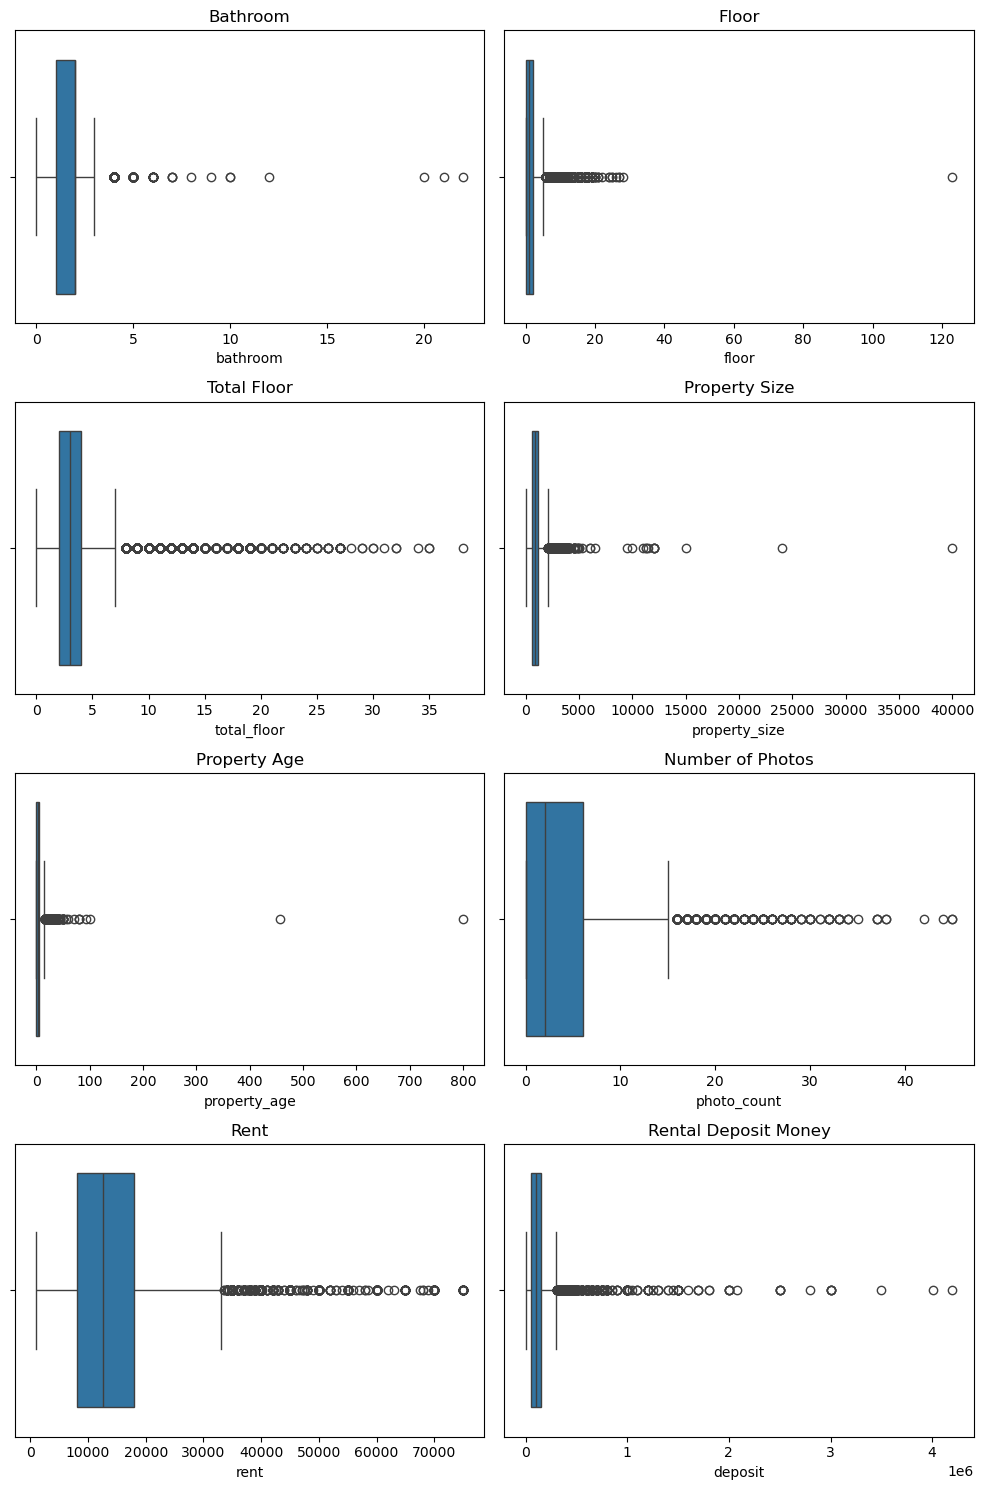

In [31]:
# We can see that there are some outliers in the following columns, based on the 5 number summary statistics.
# To get a better understanding of these outliers, we can plot box-plots for these columns.
# 
# 
# Box-plot to detect outliers for the following columns:
# >> bathroom
# >> floor
# >> property_age
# >> total_floor
# >> property_size
# >> rent
# >> deposit
# >> photo_count
# -------------------------------------------------------------------------------
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10,15))

sns.boxplot(x=df['bathroom'], ax=axs[0, 0], orient='h')
axs[0, 0].set_title('Bathroom')

sns.boxplot(x=df['floor'], ax=axs[0, 1], orient='h')
axs[0, 1].set_title('Floor')

sns.boxplot(x=df['total_floor'], ax=axs[1, 0], orient='h')
axs[1, 0].set_title('Total Floor')

sns.boxplot(x=df['property_size'], ax=axs[1, 1], orient='h')
axs[1, 1].set_title('Property Size')

sns.boxplot(x=df['property_age'], ax=axs[2, 0], orient='h')
axs[2, 0].set_title('Property Age')

sns.boxplot(x=df['photo_count'], ax=axs[2, 1], orient='h')
axs[2, 1].set_title('Number of Photos')

sns.boxplot(x=df['rent'], ax=axs[3, 0], orient='h')
axs[3, 0].set_title('Rent')

sns.boxplot(x=df['deposit'], ax=axs[3, 1], orient='h')
axs[3, 1].set_title('Rental Deposit Money')

# Adjust layout
plt.tight_layout()
plt.show()


Soft Capping Done!!

(27888, 26)


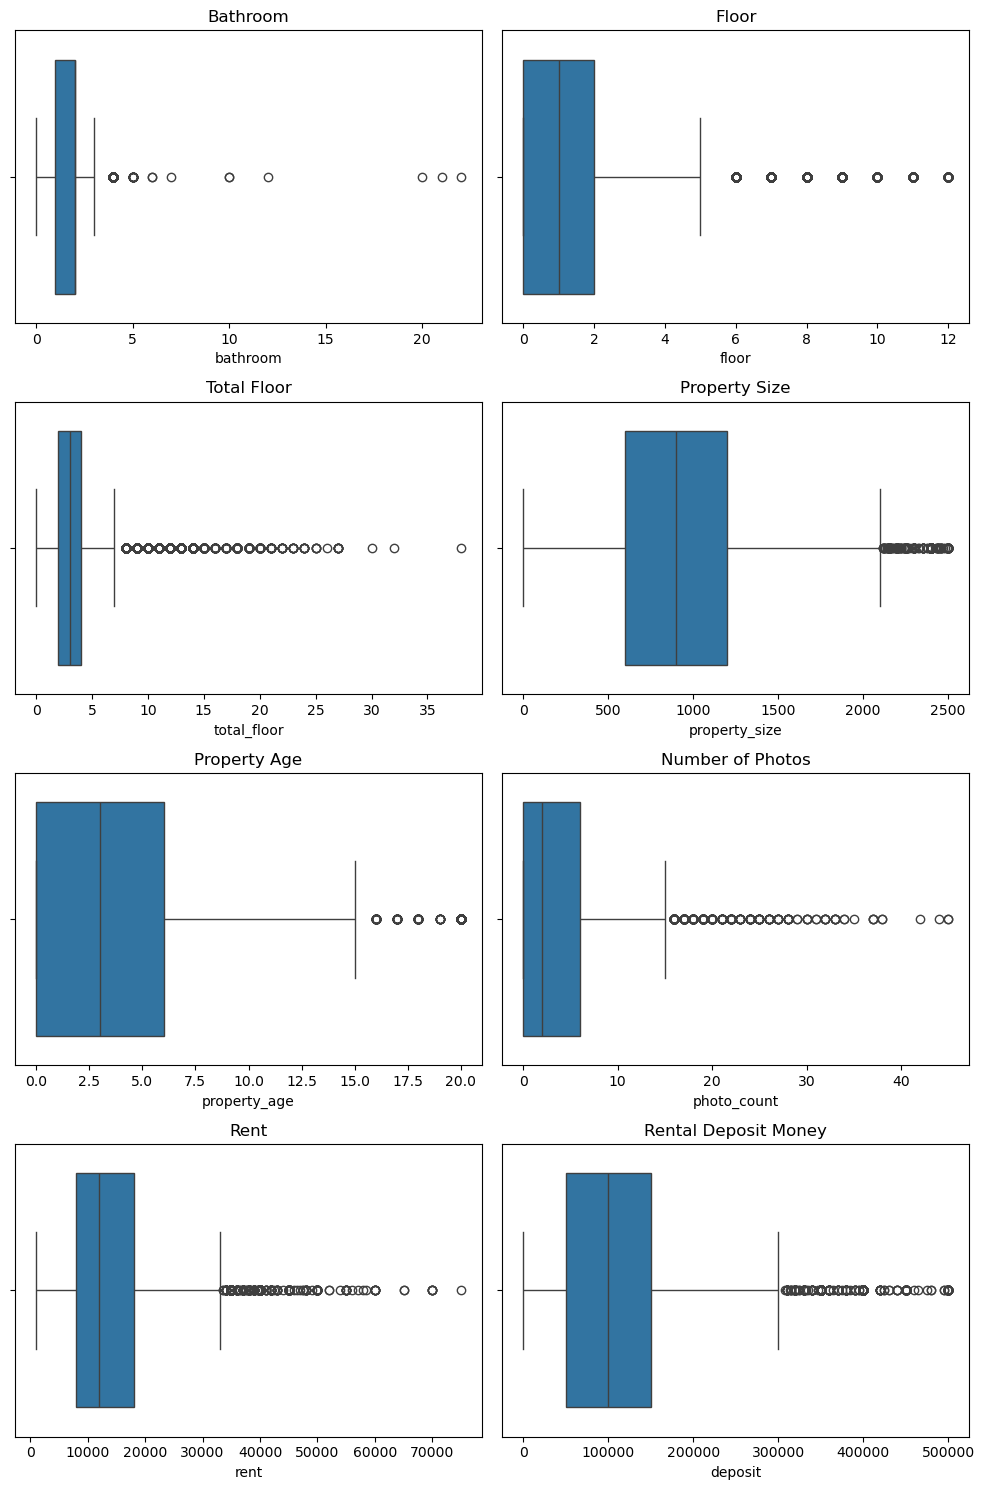

In [32]:
# We can see that there are a few outliers in some of the columns (variables)
# So, we can perform soft capping to remove these outliers, since we don't want to remove a huge portion of the data.
# We use the soft capping method where we replace the outliers with the corresponding percentile limit.

def soft_cap_outliers(df, column, lower_percentile=None, upper_percentile=None):
    if lower_percentile is not None:
        lower_limit = np.percentile(df[column], lower_percentile)
        df = df[df[column] >= lower_limit]
    if upper_percentile is not None:
        upper_limit = np.percentile(df[column], upper_percentile)
        df = df[df[column] <= upper_limit]
    return df

# We plant to soft cap top 99% percent of outliers only "property_age", "deposit", "property_size" and "floor" column
df = soft_cap_outliers(df, 'property_age', upper_percentile=99)
df = soft_cap_outliers(df, 'deposit', upper_percentile=99)
df = soft_cap_outliers(df, 'property_size', upper_percentile=99)
df = soft_cap_outliers(df, 'floor', upper_percentile=99)

print("\nSoft Capping Done!!\n")
print(df.shape)

# Re-check the distribution of various columns after soft capping
# ---------------------------------------------------------------
# Box-plot to detect outliers for the following columns:
# bathroom, floor, property_age, total_floor, property_size, rent,  deposit, photo_count
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(4, 2, figsize=(10,15))

sns.boxplot(x=df['bathroom'], ax=axs[0, 0], orient='h')
axs[0, 0].set_title('Bathroom')

sns.boxplot(x=df['floor'], ax=axs[0, 1], orient='h')
axs[0, 1].set_title('Floor')

sns.boxplot(x=df['total_floor'], ax=axs[1, 0], orient='h')
axs[1, 0].set_title('Total Floor')

sns.boxplot(x=df['property_size'], ax=axs[1, 1], orient='h')
axs[1, 1].set_title('Property Size')

sns.boxplot(x=df['property_age'], ax=axs[2, 0], orient='h')
axs[2, 0].set_title('Property Age')

sns.boxplot(x=df['photo_count'], ax=axs[2, 1], orient='h')
axs[2, 1].set_title('Number of Photos')

sns.boxplot(x=df['rent'], ax=axs[3, 0], orient='h')
axs[3, 0].set_title('Rent')

sns.boxplot(x=df['deposit'], ax=axs[3, 1], orient='h')
axs[3, 1].set_title('Rental Deposit Money')

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
# We can see that most of the outliers have been successfully removed.

# Now we explore the data further

### Exploratory Data Analysis (EDA)

In [34]:
# Before starting the EDA, we need to make the property_id as index and not as a column

df.set_index('property_id', inplace=True)

print(df.shape)
display(df.head())

(27888, 25)


,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,total_interactions,count_3_days,count_5_days,count_7_days
property_id,,,,,,,,,,,,,,,,,,,,,,,,,
ff808081469fd6e20146a5af948000ea,BHK2,2017-09-03 14:36:00,1,3,4,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4,0,0,0
ff8080814702d3d10147068359d200cd,BHK2,2017-07-03 12:02:00,2,4,11,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,12,0,0,0
ff808081470c645401470fb03f5800a6,BHK2,2017-10-03 13:43:00,2,0,4,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12,27,0,0,0
ff808081470c6454014715eaa5960281,BHK3,2017-09-03 22:16:00,2,3,4,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,9,13,0,0,0
ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:00,1,1,2,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,7,68,25,42,52


In [35]:
# Next we make a list of numerical and categorical columns

num_cols = df.select_dtypes(include=['int64', 'float64', 'float32', 'int32']).columns
cat_cols = df.select_dtypes(include=['object']).columns
date_cols = df.select_dtypes(include = ['datetime64[ns]']).columns

print("Date Columns: ", date_cols)
print("Numerical Columns: ", num_cols)
print("Categorical Columns: ", cat_cols)

Date Columns:  Index(['activation_date'], dtype='object')
Numerical Columns:  Index(['bathroom', 'floor', 'total_floor', 'gym', 'latitude', 'longitude',
       'lift', 'property_age', 'property_size', 'swimming_pool', 'rent',
       'deposit', 'photo_count', 'total_interactions', 'count_3_days',
       'count_5_days', 'count_7_days'],
      dtype='object')
Categorical Columns:  Index(['type', 'furnishing', 'lease_type', 'locality', 'parking', 'pin_code',
       'building_type'],
      dtype='object')


In [36]:
df.parking.value_counts()

parking
BOTH            13122
TWO_WHEELER     12568
NONE             1248
FOUR_WHEELER      950
Name: count, dtype: int64

In [37]:
df.type.value_counts()

type
BHK2        13799
BHK1         6458
BHK3         5333
RK1          1992
BHK4          282
BHK4PLUS       24
Name: count, dtype: int64

In [38]:
df.type.unique() 
# RK1 - Room Kitchen
# BHK1 - 1 Bedroom, 1 Kitchen, 1 Living Room
# BHK2 - 2 Bedrooms, 1 Kitchens, 1 Living Room
# BHK3 - 3 Bedrooms, 1 Kitchens, 1 Living Room
# BHK4 - 4 Bedrooms, 1 Kitchens, 1 Living Room
# BHK4 Plus - 

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [39]:
print(cat_cols)

Index(['type', 'furnishing', 'lease_type', 'locality', 'parking', 'pin_code',
       'building_type'],
      dtype='object')


#### Univariate Analysis

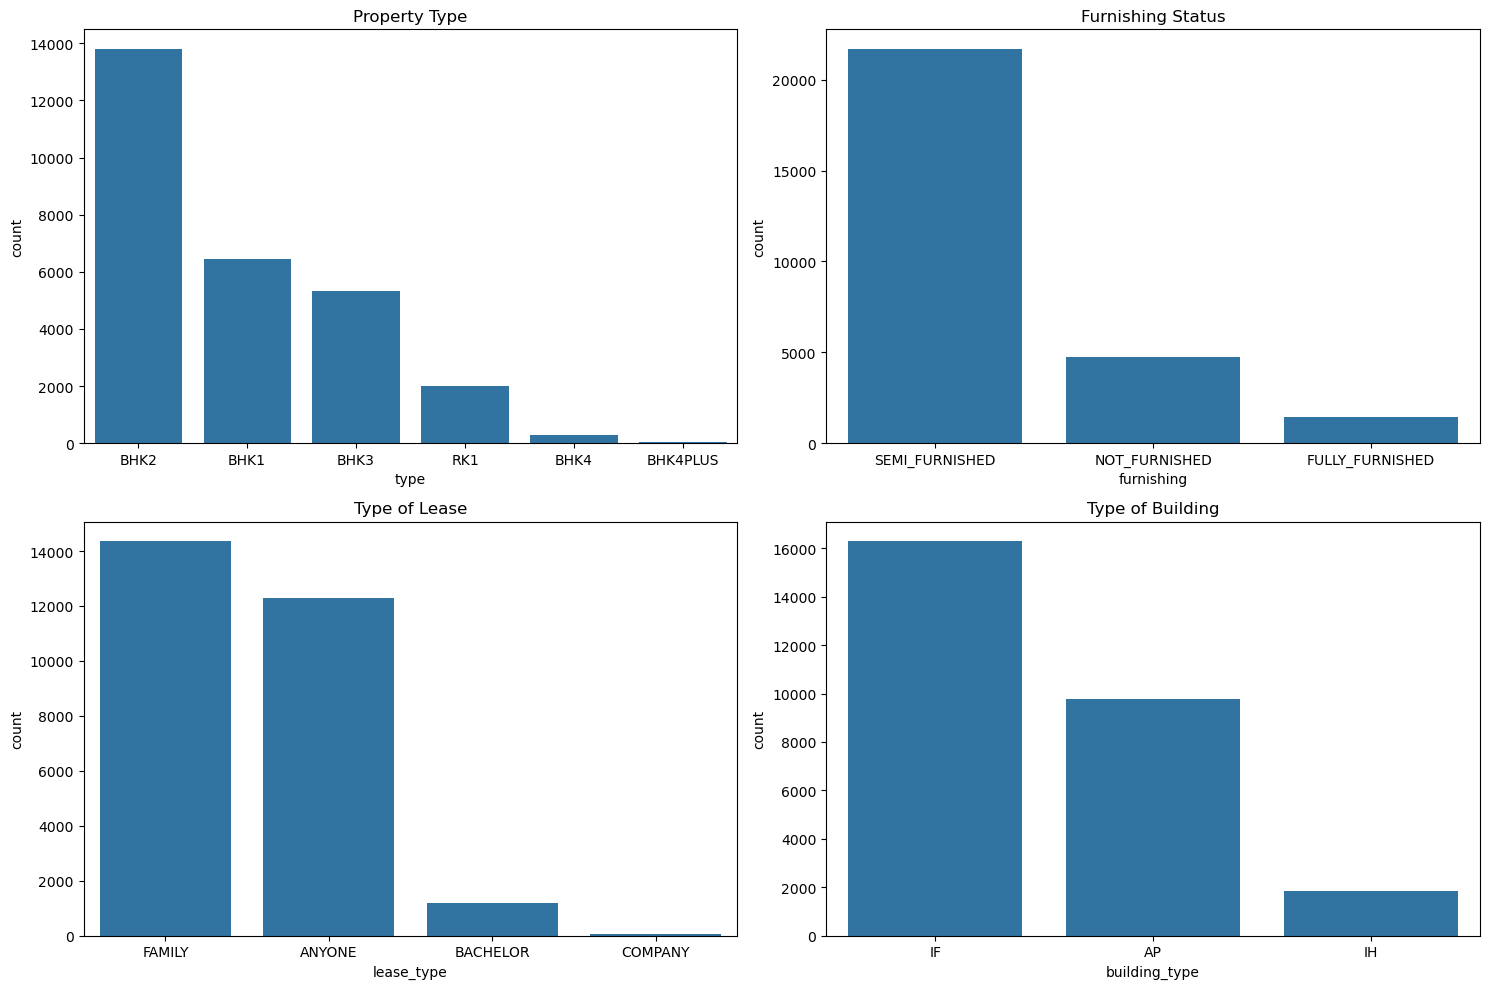

In [40]:
# Having a look at categorical variables using count plots

fig, axs = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(x='type', data=df, ax=axs[0,0], order=df['type'].value_counts().index) # ax=axs[3, 0]
axs[0, 0].set_title('Property Type')

sns.countplot(x='furnishing', data=df, ax=axs[0,1], order=df['furnishing'].value_counts().index)
axs[0, 1].set_title('Furnishing Status')

sns.countplot(x='lease_type', data=df, ax=axs[1,0], order=df['lease_type'].value_counts().index)
axs[1, 0].set_title('Type of Lease')

sns.countplot(x='building_type', data=df, ax=axs[1,1], order=df['building_type'].value_counts().index)
axs[1, 1].set_title('Type of Building')

# Adjust layout
plt.tight_layout()
plt.show()
# sns.countplot(df['lease_type'])
# plt.show()

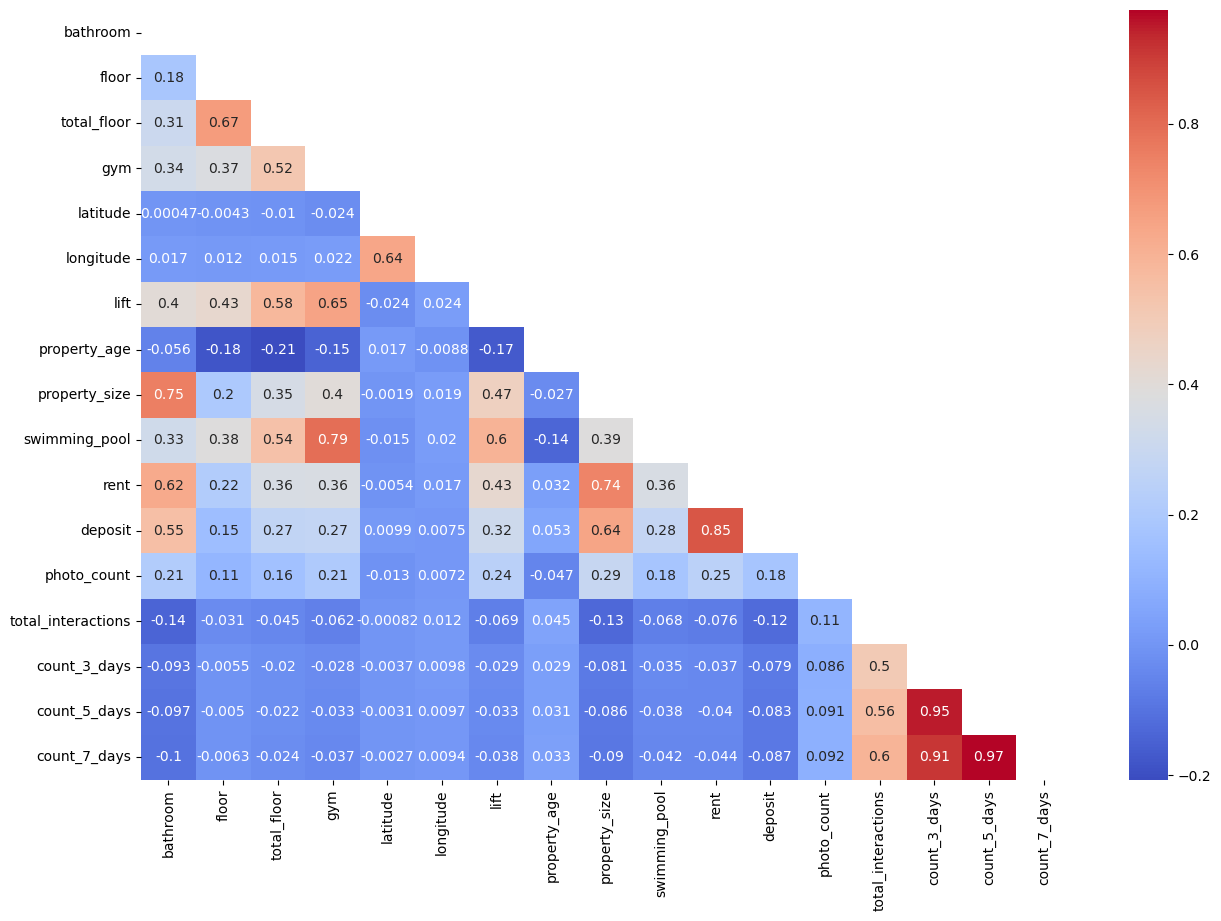

In [43]:
# Now, let's look at the correlation matrix to understand the relationship between the variables.

correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(15, 10))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap='coolwarm')
plt.show()
# From the correlation matrix, we can see that the following variables have a high correlation: